In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
linux_records = pd.read_csv(r"C:\Users\Calin PC\Documents\Proiecte\linux_monitoring_project\data\linux_records.csv")
linux_records.head()

,record_timestamp,devtmpfs,sda1,cs_root,tmpfs_root,usr,nice,sys,iowait,irq,...,idle,mem_total,mem_used,mem_free,mem_shared,mem_buffcached,mem_available,swap_total,swap_used,swap_free
0,2024-02-26 17:20:30.671+02,4096,714040,11808860,714040,1.06,0.0,1.17,0.11,0,...,97.49,3747104,2208760,205736,5964,1626864,1542332,NaN,2840,2094308
1,2024-02-26 17:21:30.792+02,4096,714040,11808728,714040,1.06,0.0,1.20,0.11,0,...,97.45,3747104,2220780,199468,5964,1576000,1524760,NaN,2840,2094308
2,2024-02-26 17:23:56.825+02,4096,714040,11808180,714040,1.04,0.0,1.21,0.10,0,...,97.47,3747104,2228076,191100,5964,1580052,1517444,2097148.0,2840,2094308
3,2024-02-26 17:24:56.984+02,4096,714040,11807320,714040,1.04,0.0,1.24,0.10,0,...,97.44,3747104,2246040,177412,5964,1578688,1502140,2097148.0,2840,2094308
4,2024-02-26 17:25:57.145+02,4096,714040,11808340,714040,1.04,0.0,1.26,0.10,0,...,97.42,3747104,2252388,155400,5964,1575720,1495952,2097148.0,2840,2094308


Converting record_timestamp into datetime

In [3]:
linux_records['record_timestamp'] = pd.to_datetime(linux_records['record_timestamp'], errors='coerce', infer_datetime_format=True)

C:\Users\Calin PC\AppData\Local\Temp\ipykernel_18688\249436720.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  linux_records['record_timestamp'] = pd.to_datetime(linux_records['record_timestamp'], errors='coerce', infer_datetime_format=True)


Analyzing data by 2nd of March
- memory usage
- cpu usage

In [4]:
march_2nd_data = linux_records[linux_records['record_timestamp'].dt.date == pd.to_datetime('2024-03-02').date()]

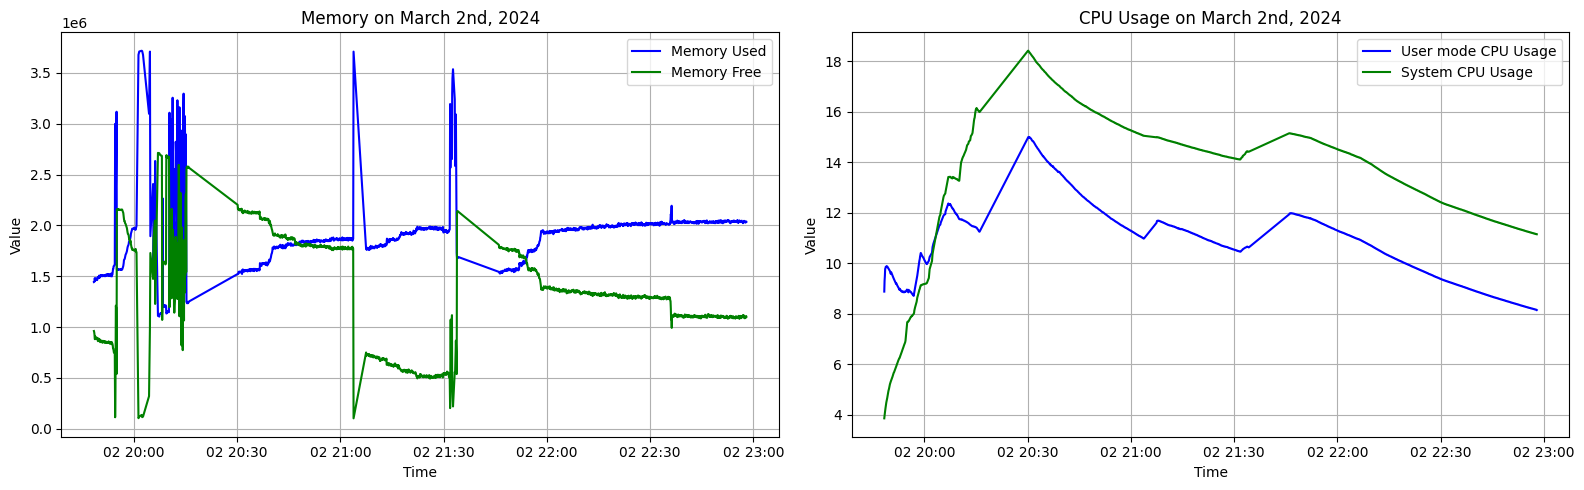

In [5]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(march_2nd_data['record_timestamp'], march_2nd_data['mem_used'], label='Memory Used', color='blue')
plt.plot(march_2nd_data['record_timestamp'], march_2nd_data['mem_free'], label="Memory Free", color='green')
plt.title('Memory on March 2nd, 2024')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(march_2nd_data['record_timestamp'], march_2nd_data['usr'], label='User mode CPU Usage', color='blue')
plt.plot(march_2nd_data['record_timestamp'], march_2nd_data['sys'], label='System CPU Usage', color='green')
plt.title('CPU Usage on March 2nd, 2024')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

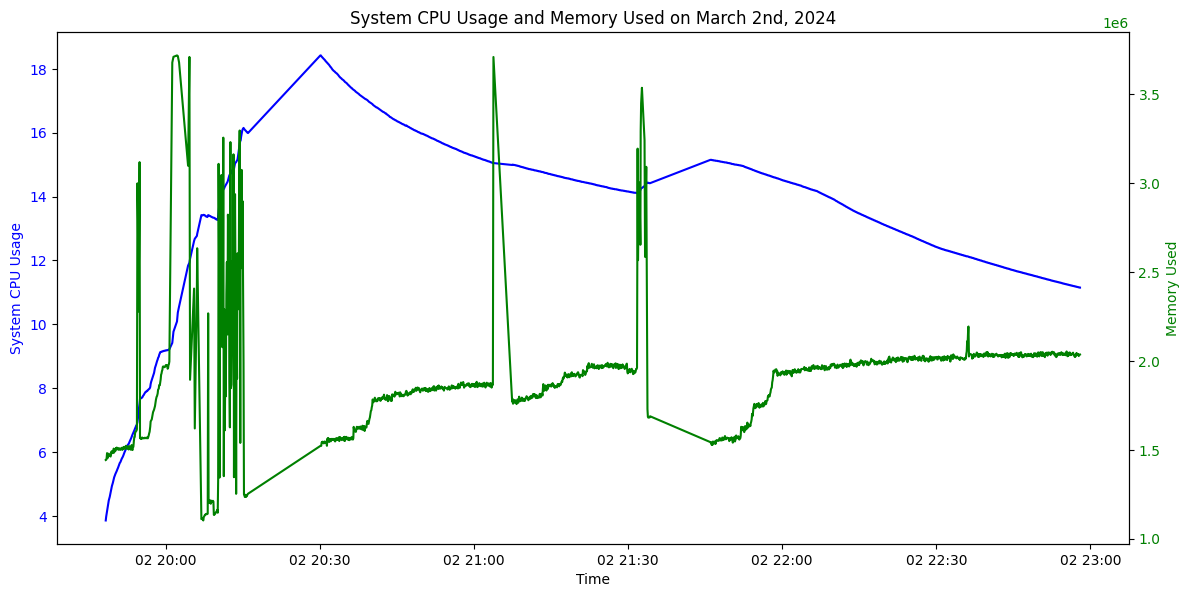

In [6]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Time')
ax1.set_ylabel('System CPU Usage', color='blue')
ax1.plot(march_2nd_data['record_timestamp'], march_2nd_data['sys'], color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2=ax1.twinx()
ax2.set_ylabel('Memory Used', color='green')
ax2.plot(march_2nd_data['record_timestamp'], march_2nd_data['mem_used'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.tight_layout()
plt.title('System CPU Usage and Memory Used on March 2nd, 2024')
plt.show()


